In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# basic modifications
sns.set_style('whitegrid')

In [11]:
df_videos_data = pd.read_csv('./data/videos_data.csv')
df_videos_data.shape

(5528, 8)

In [12]:
df_videos_data.replace('None', np.nan, inplace=True)
df_videos_data.isnull().sum()

channelTitle         0
videoId              0
videoTitle           0
videoViews           0
videoLike            7
videoDislike         7
videoComment         1
publishedDateTime    0
dtype: int64

In [13]:
df_videos_data.dtypes

channelTitle          object
videoId               object
videoTitle            object
videoViews             int64
videoLike            float64
videoDislike         float64
videoComment         float64
publishedDateTime     object
dtype: object

In [14]:
convert_types = df_videos_data.columns[3:-1]
df_videos_data[convert_types] = df_videos_data[convert_types].apply(pd.to_numeric)
df_videos_data.dtypes

channelTitle          object
videoId               object
videoTitle            object
videoViews             int64
videoLike            float64
videoDislike         float64
videoComment         float64
publishedDateTime     object
dtype: object

Text(0, 0.5, 'Videos Count')

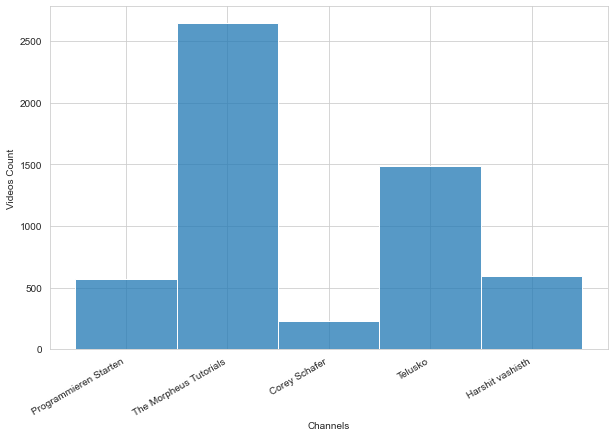

In [15]:
# plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10,7))
fig.autofmt_xdate()
sns.histplot(ax=ax, data=df_videos_data['channelTitle'])
plt.xlabel('Channels')
plt.ylabel('Videos Count')

In [16]:
df_videos_data['is_python'] = df_videos_data['videoTitle'].apply(lambda x: x.lower() ).str.contains('python') + 0
df_videos_data['is_python'].value_counts()

0    4639
1     889
Name: is_python, dtype: int64

In [17]:
df_videos_data.head()

,channelTitle,videoId,videoTitle,videoViews,videoLike,videoDislike,videoComment,publishedDateTime,is_python
0,Programmieren Starten,XBqzscczGb8,Deine Ideen sind wertlos... (Programmierer REA...,2520,158.0,15.0,38.0,2021-11-03T15:30:08Z,0
1,Programmieren Starten,OVbgYjKeX-A,Dein C# Lernplan!,2404,186.0,0.0,49.0,2021-11-02T17:26:15Z,0
2,Programmieren Starten,sLFZy9NEjKI,Programmieren ist einfach!,5495,457.0,10.0,65.0,2021-11-01T14:54:14Z,0
3,Programmieren Starten,ZXbzotEUr0w,Zufallszahlen in C# generieren - C# Random Tut...,1810,61.0,0.0,5.0,2021-10-31T14:28:30Z,0
4,Programmieren Starten,-AbUHXfpYVk,In C# schneller Programmieren mit SNIPPETS!,1583,153.0,1.0,21.0,2021-10-30T14:07:03Z,0


In [18]:
df_Channels = pd.read_csv('./data/channel_statistics.csv', index_col='channelTitle')
df_Channels.drop(['channelId','uploadsId'], inplace=True, axis=1)
df_Channels = df_Channels.applymap(lambda x: np.nan if x == 'None' else x)
df_Channels[df_Channels.columns[2:]] = df_Channels[df_Channels.columns[2:]].apply(pd.to_numeric)

df_Channels

,videoCount,subscriberCount,viewCount,commentCount
channelTitle,,,,
Programmieren Starten,570,99300,10151913,NaN
The Morpheus Tutorials,2649,180000,26253018,NaN
Corey Schafer,230,848000,64296598,NaN
Telusko,1486,1520000,171119565,NaN
Harshit vashisth,593,177000,27011292,NaN


In [19]:
df_videos_data_stats = pd.DataFrame(df_videos_data.groupby(df_videos_data['channelTitle'])['videoId'].count()) \
    .merge(df_videos_data.groupby(df_videos_data['channelTitle']).sum(), on='channelTitle')
df_videos_data_stats

,videoId,videoViews,videoLike,videoDislike,videoComment,is_python
channelTitle,,,,,,
Corey Schafer,230,64314892,1440705.0,11456.0,73788.0,132
Harshit vashisth,593,27013973,446043.0,6953.0,38079.0,321
Programmieren Starten,570,10160188,375873.0,3039.0,26850.0,27
Telusko,1486,171141046,2568218.0,65788.0,148902.0,105
The Morpheus Tutorials,2649,26261439,559263.0,13091.0,96636.0,304


In [20]:
df_video_ids = pd.read_csv('./data/video_ids.csv', usecols=['channelTitle','videoId'], index_col=False)

df_video_ids.replace('None', np.nan, inplace=True)

df_video_idsStats = pd.DataFrame(df_video_ids.groupby(df_video_ids['channelTitle'])['videoId'].count())

df_video_idsStats

,videoId
channelTitle,
Corey Schafer,230
Harshit vashisth,593
Programmieren Starten,570
Telusko,1486
The Morpheus Tutorials,2649


In [21]:
df_comparison = pd.concat([
    df_Channels['videoCount'],
    df_video_idsStats['videoId'],
    df_videos_data_stats['videoId']
    ],
    axis=1
)

In [22]:
old_column_names = df_comparison.columns
new_column_names = ['channelStats','fetchedVideos','actualData']
df_comparison.columns = new_column_names

In [23]:
df_comparison['channelVSfetched'] = df_comparison['channelStats'] - df_comparison['fetchedVideos']
df_comparison['fetchedVSactual'] = df_comparison['fetchedVideos'] - df_comparison['actualData']
df_comparison['%fetchedVSactual'] = df_comparison['fetchedVSactual'] / df_comparison['fetchedVideos']
df_comparison

,channelStats,fetchedVideos,actualData,channelVSfetched,fetchedVSactual,%fetchedVSactual
channelTitle,,,,,,
Programmieren Starten,570,570,570,0,0,0.0
The Morpheus Tutorials,2649,2649,2649,0,0,0.0
Corey Schafer,230,230,230,0,0,0.0
Telusko,1486,1486,1486,0,0,0.0
Harshit vashisth,593,593,593,0,0,0.0


Most loss in videos with "Corey Schafer"

In [24]:
def get_unmatched_rows(df_Name: str):
    '''Collect Unmatched rows for a channel'''
    df_temp = \
        df_video_ids.loc[df_video_ids['channelTitle'] == df_Name] \
        .merge(df_videos_data.loc[df_videos_data['channelTitle'] == df_Name], on='videoId', how='outer')

    df_temp_nulls = df_temp[ df_temp['videoViews'].isna() ]
    return df_temp_nulls

In [25]:
CoreySchafer = get_unmatched_rows('Corey Schafer')
CoreySchafer.shape

(0, 10)

In [26]:
aggType = {
    'videoViews': 'sum',
    'videoId': 'count'
}

df_df_videos_data_summary = \
    pd.pivot_table(
        df_videos_data.groupby(['channelTitle','is_python'],as_index=False) \
            .agg(aggType),
        index=['channelTitle'],
        columns=['is_python']
    )
df_df_videos_data_summary.columns=['countVidNoPython','countVidWithPython','viewsVidNoPython','viewsVidWithPython']
df_df_videos_data_summary.reset_index(inplace=True)
df_df_videos_data_summary

,channelTitle,countVidNoPython,countVidWithPython,viewsVidNoPython,viewsVidWithPython
0,Corey Schafer,98,132,12436893,51877999
1,Harshit vashisth,272,321,4046275,22967698
2,Programmieren Starten,543,27,9138736,1021452
3,Telusko,1381,105,119401196,51739850
4,The Morpheus Tutorials,2345,304,20293795,5967644


In [27]:
df_df_videos_data_summary.dtypes

channelTitle          object
countVidNoPython       int64
countVidWithPython     int64
viewsVidNoPython       int64
viewsVidWithPython     int64
dtype: object